In [2]:
import utilities
import pandas as pd
import json

# non-FP
non_fp_df = pd.read_pickle("/home/pooneh/Desktop/OpenWPM/jsons/dataframes/non_fp_df.pkl")
temp_non_fp_df = non_fp_df[non_fp_df['is_backup'] != 'No_snapshot']
#print(temp_df)

isbackup_non_fp_df  = pd.DataFrame({'count' : temp_non_fp_df.groupby(['is_backup']).size()}).reset_index()
print(isbackup_non_fp_df)

snapshot_number_non_fp_df = pd.DataFrame({'count' : temp_non_fp_df.groupby(['url_id']).size()}).reset_index()
print(snapshot_number_non_fp_df)


# FP 
fp_df = pd.read_pickle("/home/pooneh/Desktop/OpenWPM/jsons/dataframes/fp_df.pkl")
temp_fp_df = fp_df[fp_df['is_backup'] != 'No_snapshot']

isbackup_fp_df  = pd.DataFrame({'count' : temp_fp_df.groupby(['is_backup']).size()}).reset_index()
print(isbackup_fp_df)

snapshot_number_fp_df = pd.DataFrame({'count' : temp_fp_df.groupby(['url_id']).size()}).reset_index()
print(snapshot_number_fp_df)
#snapshot_number_df = grp[grp['count']>1]
#print(snapshot_number_df)

FileNotFoundError: [Errno 2] No such file or directory: '/home/pooneh/Desktop/OpenWPM/jsons/dataframes/non_fp_df.pkl'

In [8]:

#df3 = df.loc[1:10, 'url_id']
#print(df3)
#a = df.loc[df['url_id']=='9003']
#print(a.count())

#isbackup_df = pd.DataFrame(columns=['isbackup', 'count'])
#grp = non_fp_df.groupby(['is_backup']).count()
#print(grp.columns)
#isbackup_df = grp.loc[:, 'url_id']
#isbackup_df#print(isbackup_df.columns)

In [17]:
import plotly.express as px 

fig = px.pie(isbackup_df, values="count", 
             names="is_backup",  
             color_discrete_sequence=px.colors.sequential.RdBu) 
#fig.show()
colors = ['gold', 'mediumturquoise']

#fig = go.Figure(data=[go.Pie(labels=['has_snapshoot','Hydrogen','Carbon_Dioxide','Nitrogen'],
                             #values=[4500,2500,1053,500])])
#fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  #marker=dict(colors=colors, line=dict(color='#000000', width=2)))
#fig.show()

In [1]:
# What percent of of urls fp/non_fp has snapshot on wayback
import matplotlib.pyplot as plt
import numpy as np

# Make figure and axes
fig, ax = plt.subplots(1,2, figsize=(6, 3))
labels = {"No Snap shot", "Has snapshot"}
my_colors_non = ['#FFBF00','#355B85']
my_colors_fp = ['#CCCCCC','#F93549']

plt.subplots_adjust(right=2, wspace=2)

# plot of non-fp 
wedges, texts, autotexts  = ax[0].pie(isbackup_non_fp_df.loc[:,'count'], autopct='%1.1f%%', 
        startangle=30, shadow = True, colors=my_colors_non, explode=(0,0.2), radius=2, textprops={'size': '13'})
ax[0].set_title("Snapshot status for non-FP urls", pad=50)

# plot of fp
wedges, texts, autotexts  = ax[1].pie(isbackup_fp_df.loc[:,'count'], autopct='%1.1f%%', 
        startangle=30, shadow = True, colors=my_colors_fp, explode=(0,0.2), radius=2, textprops={'size': '13'})  
ax[1].set_title("Snapshot status for FP urls", pad=50)


ax[0].legend(wedges,labels,
          title="Snapshot status",
          loc="center left",
          bbox_to_anchor=(1.3, 0.5, 0.5, 1))
ax[1].legend(wedges,labels,
          title="Snapshot status",
          loc="center left",
          bbox_to_anchor=(1.3, 0.5, 0.5, 1))

plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'axis'

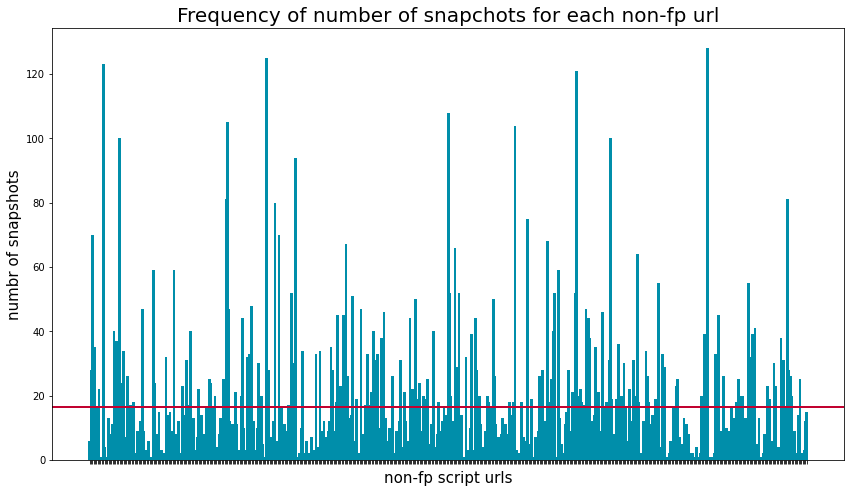

In [84]:
# For each non-fp url, how many snapshot do we have?
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11, 6))
ax = fig.add_axes([0,0,1,1])

ax.bar(snapshot_number_non_fp_df['url_id'], snapshot_number_non_fp_df['count'], color='#008EAA',width=2)
ax.set_xticklabels([])
ax.set_ylabel('numbr of snapshots', size =15)
ax.set_title('Frequency of number of snapchots for each non-fp url', size =20)
ax.set_xlabel('non-fp script urls', size =15)
ax.axhline(snapshot_number_non_fp_df['count'].mean(), color='#C10230', linewidth=2, label= 'average number of snapshots')

plt.show()

In [ ]:
# For each FP url, how many snapshot do we have?
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11, 6))
ax = fig.add_axes([0,0,1,1])

ax.bar(snapshot_number_fp_df['url_id'], snapshot_number_fp_df['count'], color='#F93549',width=2)
ax.set_xticklabels([])
ax.set_ylabel('numbr of snapshots', size =15)
ax.set_title('Frequency of number of snapchots for each non-fp url', size =20)
ax.set_xlabel('non-fp script urls', size =15)
ax.axhline(snapshot_number_fp_df['count'].mean(), color='#481268', linewidth=2, label= 'average number of snapshots')

plt.show()

(array([291., 112.,  49.,  28.,  22.,   6.,   6.,   3.,   1.,   4.,   1.,
          4.]), array([  1.        ,  11.58333333,  22.16666667,  32.75      ,
         43.33333333,  53.91666667,  64.5       ,  75.08333333,
         85.66666667,  96.25      , 106.83333333, 117.41666667,
        128.        ]), <BarContainer object of 12 artists>)

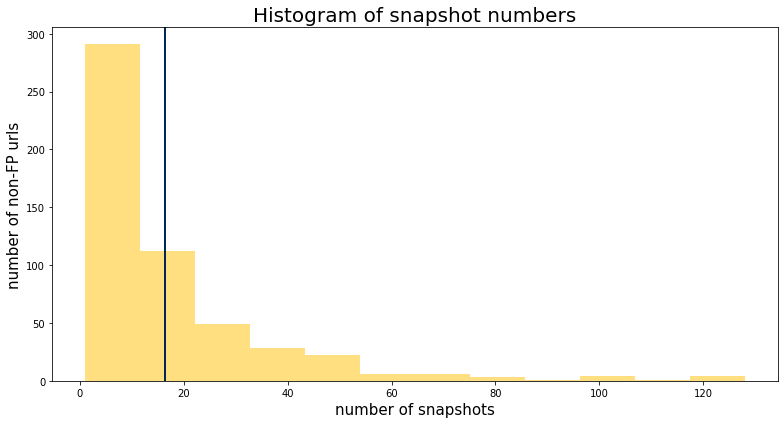

In [83]:
# how many of the non_fp urls has x snapshots
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

n_bins = 12

x = snapshot_number_non_fp_df['count']

fig, axs = plt.subplots(sharey=True, tight_layout=True, figsize=(11, 6))

axs.set_ylabel('number of non-FP urls', size =15, )
axs.set_title('Histogram of snapshot numbers', size =20)
axs.set_xlabel('number of snapshots', size =15)
axs.axvline(snapshot_non_number_fp_df['count'].mean(), color='#FFBF00', linewidth=2, label= 'average number of snapshots')

axs.hist(x, bins=n_bins, color = '#033266')

In [ ]:
# how many of the fp urls has x snapshots
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

n_bins = 12

x = snapshot_number_fp_df['count']

fig, axs = plt.subplots(sharey=True, tight_layout=True, figsize=(11, 6))

axs.set_ylabel('number of non-FP urls', size =15, )
axs.set_title('Histogram of snapshot numbers', size =20)
axs.set_xlabel('number of snapshots', size =15)
axs.axvline(snapshot_number_fp_df['count'].mean(), color='#4C4C4C', linewidth=2, label= 'average number of snapshots')

axs.hist(x, bins=n_bins, color = '#F93549')

       0    1
6   2010    7
7   2011   12
1   2012   19
8   2013   25
9   2014   34
2   2015   56
5   2016   93
10  2017  174
3   2018  290
0   2019  445
4   2020  289


<BarContainer object of 11 artists>

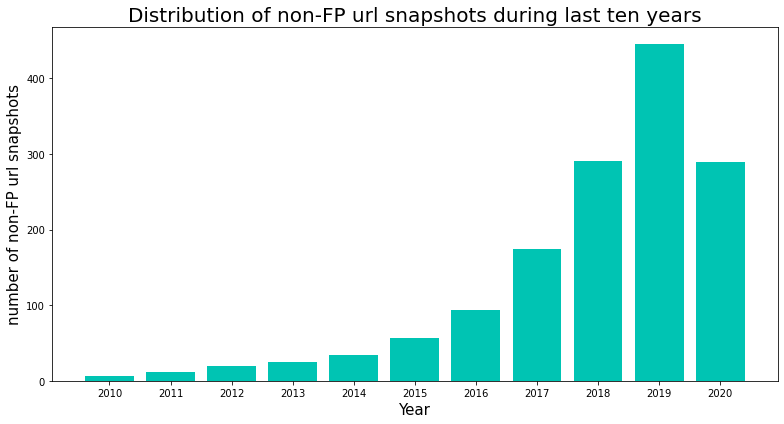

In [132]:
# how many of the non-fp urls has a snapshot in each year
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

non_fp_df4 = pd.read_pickle("/home/pooneh/Desktop/OpenWPM/jsons/dataframes/non_fp_df.pkl")
temp_df4 = non_fp_df4[non_fp_df4['is_backup'] != 'No_snapshot']
#print(temp_df4)
annual_dict = {}
p = temp_df4.groupby(['year'], as_index=False)
for year in range(2010, 2021):
    urls_in_year = list(p['url_id'].get_group(str(year)))
    urls_in_year = list(dict.fromkeys(urls_in_year))
    annual_dict[str(year)] = urls_in_year
    
#print(annual_dict)

annual_report = {}
for year, values in annual_dict.items():
    annual_report[year] = len(values)

annual_df = pd.DataFrame.from_dict(set(annual_report.items()))
annual_df = annual_df.sort_values(by=[0])
#ar = pd.DataFrame.from_dict(annual_report)
    
#n_bins = 10
labels = annual_df[1]
#annual_data = annual_df['count']
##print(annual_df)

fig, axs = plt.subplots(sharey=True, tight_layout=True, figsize=(11, 6))

axs.set_ylabel('number of non-FP url snapshots', size =15, )
axs.set_title('Distribution of non-FP url snapshots during last ten years', size =20)
axs.set_xlabel('Year', size =15)
#axs.axvline(annual_df[1].mean(), color='#022851', linewidth=2, label= 'average number of snapshots')
print(annual_df)
axs.bar(x=annual_df[0],height=annual_df[1], color = '#00C4B3')

       0    1
7   2010    2
8   2011    3
2   2012   11
10  2013   18
4   2014   30
1   2015   56
5   2016  100
9   2017  293
0   2018  511
6   2019  873
3   2020  478


<BarContainer object of 11 artists>

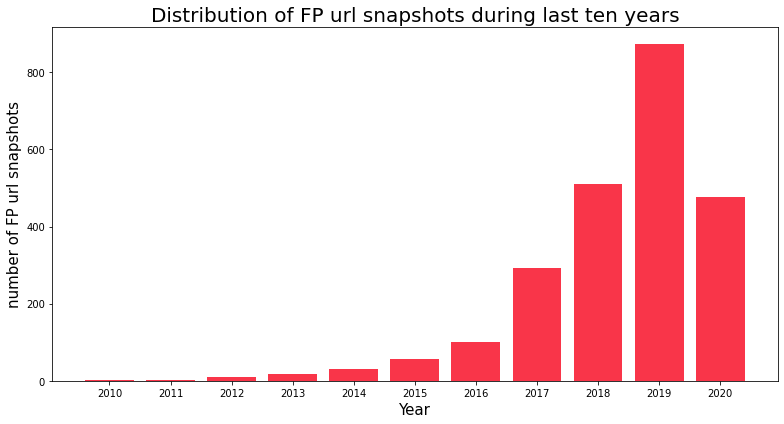

In [4]:
# how many of the fp urls has a snapshot in each year
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import pandas as pd


fp_df4 = pd.read_pickle("/home/pooneh/Desktop/OpenWPM/jsons/dataframes/fp_df.pkl")
temp_df4 = fp_df4[fp_df4['is_backup'] != 'No_snapshot']
#print(temp_df4)
annual_dict = {}
p = temp_df4.groupby(['year'], as_index=False)
for year in range(2010, 2021):
    urls_in_year = list(p['url_id'].get_group(str(year)))
    urls_in_year = list(dict.fromkeys(urls_in_year))
    annual_dict[str(year)] = urls_in_year
    
#print(annual_dict)

annual_report = {}
for year, values in annual_dict.items():
    annual_report[year] = len(values)

annual_df = pd.DataFrame.from_dict(set(annual_report.items()))
annual_df = annual_df.sort_values(by=[0])
#ar = pd.DataFrame.from_dict(annual_report)
    
#n_bins = 10
labels = annual_df[1]
#annual_data = annual_df['count']
##print(annual_df)

fig, axs = plt.subplots(sharey=True, tight_layout=True, figsize=(11, 6))

axs.set_ylabel('number of FP url snapshots', size =15, )
axs.set_title('Distribution of FP url snapshots during last ten years', size =20)
axs.set_xlabel('Year', size =15)
#axs.axvline(annual_df[1].mean(), color='#022851', linewidth=2, label= 'average number of snapshots')
print(annual_df)
axs.bar(x=annual_df[0],height=annual_df[1], color = '#F93549')